In [48]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [49]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt')

In [51]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483


In [74]:
df.columns
# 'exits' has extra spaces at end, need to strip TITLE not values (ints not strs)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [78]:
# Rename exits without all the extra spaces
df.rename(columns={'EXITS                                                               ':'EXITS'},inplace=True)

In [79]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [80]:
df.info()
# Need to convert DATE to datetime later on
# Here we see there are no nulls, need to examine our interest variables further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204928 entries, 0 to 204927
Data columns (total 11 columns):
C/A         204928 non-null object
UNIT        204928 non-null object
SCP         204928 non-null object
STATION     204928 non-null object
LINENAME    204928 non-null object
DIVISION    204928 non-null object
DATE        204928 non-null object
TIME        204928 non-null object
DESC        204928 non-null object
ENTRIES     204928 non-null int64
EXITS       204928 non-null int64
dtypes: int64(2), object(9)
memory usage: 17.2+ MB


In [101]:
# Convert DATE to datetime in pandas to late do datetime analyses
df['DATE'] = pd.to_datetime(df['DATE'])

In [126]:
# Create day of week column to do daily analysis? Which days are worth working at stations?
df['day_of_week'] = df['DATE'].dt.weekday_name
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'day_of_week'],
      dtype='object')

In [100]:
df['DATE']

0        2019-09-14
1        2019-09-14
2        2019-09-14
3        2019-09-14
4        2019-09-14
            ...    
204923   2019-09-20
204924   2019-09-20
204925   2019-09-20
204926   2019-09-20
204927   2019-09-20
Name: DATE, Length: 204928, dtype: datetime64[ns]

In [190]:
# Check Entries
df['ENTRIES'].describe()
# Max is pretty high..

count    2.049280e+05
mean     4.210505e+07
std      2.155757e+08
min      0.000000e+00
25%      2.898092e+05
50%      2.040950e+06
75%      6.618936e+06
max      2.129093e+09
Name: ENTRIES, dtype: float64

In [152]:
df['ENTRIES'].max()/1000

2129093.303

In [191]:
gb_station = df.groupby('STATION')

In [193]:
gb_station['ENTRIES'].max()

STATION
1 AV                955648374
103 ST               25635215
103 ST-CORONA        15796577
104 ST             2025854023
110 ST               14169322
                      ...    
WOODLAWN              8428033
WORLD TRADE CTR    1580049935
WTC-CORTLANDT       730833374
YORK ST              15999663
ZEREGA AV              979162
Name: ENTRIES, Length: 378, dtype: int64

In [120]:
# Groupby unit to try to find which one is producing the outlier maxes
gb_unit = df.groupby('UNIT')

In [189]:
gb_unit['ENTRIES'].max() # How to see which one is giving the max..

UNIT
R001    135332620
R003      4772217
R004      6012670
R005      7994963
R006     33554707
          ...    
R551       186747
R552       265526
R570    117442271
R571     36570147
R572      2490642
Name: ENTRIES, Length: 468, dtype: int64

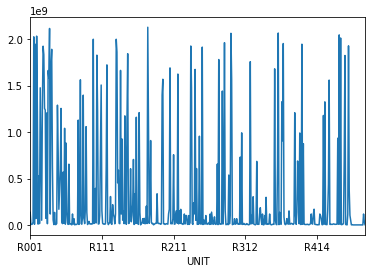

In [134]:
gb_unit['ENTRIES'].max().plot(kind='line')

In [81]:
# Check Exits
df['EXITS'].describe()

count    2.049280e+05
mean     3.487423e+07
std      1.995488e+08
min      0.000000e+00
25%      1.294348e+05
50%      1.179450e+06
75%      4.535505e+06
max      2.123772e+09
Name: EXITS, dtype: float64

In [89]:
df['C/A'].unique()

array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A015', 'A016',
       'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031', 'A033',
       'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042', 'A043',
       'A046', 'A047', 'A049', 'A050', 'A052', 'A053', 'A054', 'A055',
       'A058', 'A060', 'A061', 'A064', 'A066', 'A069', 'A071', 'A077',
       'A081', 'A082', 'A083', 'A084', 'A085', 'B004', 'B009', 'B010',
       'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018', 'B019',
       'B020', 'B021', 'B022', 'B023', 'B024', 'B024A', 'B025', 'B026',
       'B027', 'B028', 'B029', 'B031', 'B032', 'B034', 'C001', 'C003',
       'C004', 'C008', 'C009', 'C010', 'C011', 'C012', 'C014', 'C015',
       'C016', 'C017', 'C018', 'C019', 'C020', 'C023', 'C024', 'C025',
       'C026', 'C027', 'C028', 'D001', 'D002', 'D003', 'D004', 'D005',
       'D006', 'D008', 'D009', 'D010', 'D011', 'D012', 'D015', 'D016',
       'E001', 'E003', 'E004', 'E005', 'E009', 'E011', 'E012', 'E013',
     

In [90]:
df['UNIT'].unique() # why are there less 'unit' than 'c/a'

array(['R051', 'R079', 'R080', 'R081', 'R032', 'R022', 'R023', 'R082',
       'R083', 'R170', 'R085', 'R086', 'R462', 'R463', 'R087', 'R088',
       'R227', 'R001', 'R142', 'R311', 'R118', 'R044', 'R028', 'R125',
       'R171', 'R411', 'R412', 'R196', 'R148', 'R098', 'R262', 'R184',
       'R149', 'R263', 'R228', 'R229', 'R211', 'R150', 'R230', 'R136',
       'R172', 'R264', 'R108', 'R089', 'R099', 'R057', 'R231', 'R258',
       'R246', 'R278', 'R455', 'R197', 'R232', 'R233', 'R213', 'R214',
       'R215', 'R216', 'R390', 'R391', 'R398', 'R392', 'R393', 'R394',
       'R395', 'R396', 'R397', 'R368', 'R369', 'R234', 'R247', 'R370',
       'R371', 'R372', 'R373', 'R374', 'R399', 'R400', 'R151', 'R312',
       'R175', 'R163', 'R330', 'R248', 'R235', 'R268', 'R249', 'R250',
       'R265', 'R294', 'R279', 'R236', 'R137', 'R266', 'R295', 'R313',
       'R348', 'R349', 'R350', 'R375', 'R376', 'R152', 'R535', 'R536',
       'R460', 'R352', 'R353', 'R377', 'R378', 'R379', 'R380', 'R381',
      

In [1]:
df.groupby(['UNIT','STATION',  'SCP'])

NameError: name 'df' is not defined

In [ ]:
gp_